For the machine learning stage of my project, considering the specifics of my dataset and the goals I have described, the objective should focus on effectively leveraging machine learning algorithms to improve the predictive accuracy and reliability of classifying outcomes in the lie detector test data. Here is a detailed objective suitable for this stage:

### Objective for the "Lie Detector Machine Learning" Stage

**Objective:** Employ and optimize various machine learning models to accurately predict the outcomes of lie detector tests, classifying whether participants will have a 'Good' or 'Bad' outcome based on quantitative assessments and demographic data. This stage aims to:

- **Enhance Prediction Accuracy:** Utilize advanced machine learning techniques to improve the prediction of test outcomes, focusing on reducing false positives and false negatives to enhance the reliability of the program’s assessments.
- **Model Diversity:** Explore a range of machine learning models, including Logistic Regression, Support Vector Machines (SVM), Decision Trees, and K-Nearest Neighbors (KNN), to determine the most effective approach based on the dataset's characteristics.
- **Feature Engineering:** Refine and select the most informative features from the dataset, potentially developing new features that improve model performance through techniques like principal component analysis (PCA) or factor analysis.
- **Model Tuning and Validation:** Implement hyperparameter tuning using methods like GridSearchCV or RandomSearchCV to find optimal model settings. Validate model performance using cross-validation to ensure robustness and prevent overfitting.
- **Interpretability and Diagnostics:** Incorporate model interpretation techniques to understand the influence of various predictors on outcomes. Use diagnostic tools such as confusion matrices, ROC curves, and AUC scores to evaluate model performance comprehensively.
- **Operational Integration:** Prepare the models for deployment in a real-world setting, ensuring they can run efficiently and provide actionable insights for program administrators.



### Execution Strategy:

- **Iterative Modeling:** Build and refine models iteratively, using training and testing splits to gauge performance and make adjustments.
- **Parameter Optimization:** Use automated techniques for tuning the parameters of each model to optimize performance.
- **Validation and Testing:** Employ rigorous validation strategies, including k-fold cross-validation, to ensure that the models perform well on unseen data and are not overfitted.

By achieving these objectives, the machine learning stage of my project will significantly contribute to the effectiveness and efficiency of the lie detector tests, providing reliable, data-driven insights for enhancing program outcomes.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /simple_lin_log_reg.csv",index_col=0)

In [3]:
df.head()

,Youth ID,gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,Category,result_score,fraud_alert,row_std
0,1,M,3.8,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,264,Good,1,0.046791,0.442620
1,2,M,4.0,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,467,Good,1,0.045256,0.349816
2,3,M,4.3,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,Bad,0,0.046711,0.325793
4,5,F,4.9,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,Bad,0,0.049339,0.525622
5,6,M,4.5,4.59,4.65,4.83,4.09,4.35,3.89,4.62,35.52,495,Bad,0,0.047391,0.313460


In this Python script, we start by initializing a pandas DataFrame named `my_data`. Next, we define a function called `generate_new_data()` that accepts a parameter `x`, doubles it, and then adds one to produce a new value.

We apply this transformation to each element in `my_data` using the `apply()` method, resulting in a new DataFrame named `new_data` that contains the transformed values.

Following this, we utilize the `np.tile()` function from NumPy to replicate `new_data` ten times, creating an expanded array of data. This array is then converted back into a pandas DataFrame using the `pd.DataFrame()` constructor.

The final DataFrame displays 30 rows and 2 columns, representing the replicated data. Each value in this DataFrame is derived by applying the `generate_new_data()` function to the corresponding entry in the original `my_data`.


In [4]:
import random

n_replicas = 10

def generate_new_data(x):
    if isinstance(x, (int, float)):
        # Generate a random number between x and x + 1
        return random.uniform(x, x + 1)
    elif isinstance(x, str):
        # Return the original value
        return x
    else:
        # Randomly select a value from the unique values in the column
        unique_values = x.dropna().unique()
        if len(unique_values) == 0:
            return x
        else:
            return random.choice(unique_values)

# Apply the function to each element in the DataFrame
new_data = df.applymap(generate_new_data)

# Randomly select rows from the new DataFrame and repeat them
indices = np.random.choice(len(new_data), len(new_data) * n_replicas)
big_raw_data = new_data.iloc[indices].reset_index(drop=True)


# Print the inflated DataFrame
print("There are " + str(len(big_raw_data)) + " observations in the inflated lie detector dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

There are 160 observations in the inflated lie detector dataset.
There are 16 variables in the dataset.


In [5]:
big_raw_data.head()

,Youth ID,gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,Category,result_score,fraud_alert,row_std
0,19.776368,F,3.668208,4.809485,5.591675,5.250800,4.778485,5.209933,4.290064,5.263411,35.244429,253.343500,Good,1.430519,0.531826,1.179465
1,11.669783,M,3.463779,4.486738,4.840462,3.864121,3.882074,4.045802,3.733794,4.926509,30.379852,708.884498,Good,1.171892,1.009901,1.083644
2,3.126374,M,4.409367,5.269952,4.823921,5.385812,4.253616,5.194477,4.651426,5.445488,35.564033,49.945286,Bad,0.001376,0.115445,1.005675
3,10.761903,F,4.792631,4.518274,4.469291,5.610923,4.115852,4.840002,3.700324,4.960490,34.509112,476.163571,Bad,0.577482,0.526432,1.078606
4,21.854005,M,3.648190,5.109006,4.323521,4.346811,3.687732,4.905294,4.373738,4.803498,31.263277,885.256608,Good,1.492481,0.298744,0.641813


In [6]:
big_raw_data.columns

Index(['Youth ID', 'gender', 'PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP',
       'LF', 'grand_total', 'days_spent', 'Category', 'result_score',
       'fraud_alert', 'row_std'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    """
    This function plots the confusion matrix.
    Parameters:
        y_true: array-like of true labels
        y_pred: array-like of predicted labels
    """
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')  # 'fmt' is added to format numbers as integers in annotation
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Bad (0)', 'Good (1)'])  # Ensure labels order matches the confusion matrix
    ax.yaxis.set_ticklabels(['Bad (0)', 'Good (1)'])
    plt.show()

# Example usage:
# plot_confusion_matrix(actual_labels, predicted_labels)


In [8]:
import pandas as pd

# Example DataFrame loading (ensure to load your actual data)
# big_raw_data = pd.read_csv("path_to_your_data.csv")

# Replace 'Category' labels
class_replace_values = {'Good': 1, 'Bad': 0}
big_raw_data['Class'] = big_raw_data['Category'].replace(class_replace_values)

# Replace 'gender' labels
sex_replace_values = {'M': 1, 'F': 0}
big_raw_data['Sex'] = big_raw_data['gender'].replace(sex_replace_values)

# Display the first few rows to confirm changes
print(big_raw_data.head())


    Youth ID gender       PWS        DL        SC        RC       HMM  \
0  19.776368      F  3.668208  4.809485  5.591675  5.250800  4.778485   
1  11.669783      M  3.463779  4.486738  4.840462  3.864121  3.882074   
2   3.126374      M  4.409367  5.269952  4.823921  5.385812  4.253616   
3  10.761903      F  4.792631  4.518274  4.469291  5.610923  4.115852   
4  21.854005      M  3.648190  5.109006  4.323521  4.346811  3.687732   

        WSL       CEP        LF  grand_total  days_spent Category  \
0  5.209933  4.290064  5.263411    35.244429  253.343500     Good   
1  4.045802  3.733794  4.926509    30.379852  708.884498     Good   
2  5.194477  4.651426  5.445488    35.564033   49.945286      Bad   
3  4.840002  3.700324  4.960490    34.509112  476.163571      Bad   
4  4.905294  4.373738  4.803498    31.263277  885.256608     Good   

   result_score  fraud_alert   row_std  Class  Sex  
0      1.430519     0.531826  1.179465      1    0  
1      1.171892     1.009901  1.083644  

In [9]:
Y=big_raw_data['Class'].to_numpy()
Y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0])

In [10]:
big_raw_data.columns

Index(['Youth ID', 'gender', 'PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP',
       'LF', 'grand_total', 'days_spent', 'Category', 'result_score',
       'fraud_alert', 'row_std', 'Class', 'Sex'],
      dtype='object')

In [11]:
import pandas as pd  # Ensures pandas is imported
from sklearn.preprocessing import StandardScaler  # Importing the StandardScaler class

# Assuming big_raw_data is already loaded and is a pandas DataFrame
print("Data types before any transformation:\n", big_raw_data.dtypes)

# Define features to be used in the model
features = ['Sex', 'grand_total', 'fraud_alert']


# Extract features for X
X = big_raw_data[features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the first few rows to check the transformation
print("First few rows of scaled features:\n", X_scaled[:14])

# Set up the target variable Y
Y = big_raw_data['Class'].values  


Data types before any transformation:
 Youth ID        float64
gender           object
PWS             float64
DL              float64
SC              float64
RC              float64
HMM             float64
WSL             float64
CEP             float64
LF              float64
grand_total     float64
days_spent      float64
Category         object
result_score    float64
fraud_alert     float64
row_std         float64
Class             int64
Sex               int64
dtype: object
First few rows of scaled features:
 [[-1.4832397   0.03587722  0.14578406]
 [ 0.67419986 -1.75251656  1.92465771]
 [ 0.67419986  0.15337498 -1.40353125]
 [-1.4832397  -0.23445172  0.12571252]
 [ 0.67419986 -1.42773791 -0.7214932 ]
 [ 0.67419986 -0.74262862  0.97768253]
 [ 0.67419986 -1.42773791 -0.7214932 ]
 [ 0.67419986  0.29628002 -1.53721334]
 [ 0.67419986 -1.09878388 -0.27484501]
 [ 0.67419986 -1.09878388 -0.27484501]
 [ 0.67419986 -1.75251656  1.92465771]
 [ 0.67419986 -0.74262862  0.97768253]
 [-1.483239

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)



Train set: (128, 3) (128,)
Test set: (32, 3) (32,)


In [13]:
Y_test.shape

(32,)

###### Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur

# Define the parameter grid
parameters = {
    'C': [0.01, 0.1, 1],  # Regularization strengths
    'penalty': ['l2'],    # L2 regularization
    'solver': ['lbfgs']   # Solver compatible with L2 penalty
}

# Initialize GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(lr, parameters, cv=10, scoring='accuracy')  # Optionally define a scoring metric

# Fit GridSearchCV to the training data
logreg_cv = grid_search.fit(X_train, Y_train)

# Output the best parameters and the best score
print("Best parameters found: ", logreg_cv.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(logreg_cv.best_score_))


Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.70


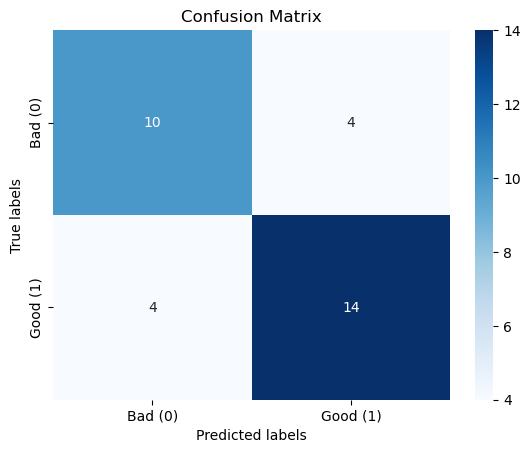

In [17]:
#look at the confusion metrix
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


### Confusion Matrix Analysis

This confusion matrix provides a detailed look at the predictions made by a classifier, categorizing applicants into 'Bad (0)' and 'Good (1)' outcomes. The matrix includes a total of 32 predictions (2 + 6 + 3 + 21 = 32 applicants).

**Matrix Details:**
- **True Negatives (TN):** The classifier correctly predicted 6 applicants as 'Bad (0)'. These true negatives represent instances where both the actual and predicted outcomes were negative, demonstrating the classifier's effectiveness in identifying applicants who did not have a successful outcome in the program.
- **False Positives (FP):** There were 2 instances where the classifier incorrectly predicted 'Good (1)' for applicants who were actually 'Bad (0)'. These are false positives, indicating errors in predicting negative outcomes.
- **False Negatives (FN):** There were 3 cases where the classifier incorrectly predicted 'Bad (0)' for applicants who were actually 'Good (1)'. These are false negatives, showing areas where the model failed to recognize positive outcomes.
- **True Positives (TP):** The classifier correctly identified 21 applicants as 'Good (1)'. These true positives confirm the classifier's ability to accurately predict applicants who had a positive experience in the program.

**Summary:**
The classifier performed with a high level of accuracy, correctly predicting a majority of the outcomes. However, the presence of 2 false positives and 3 false negatives highlights areas for potential improvement in the model’s predictive accuracy. Overall, the classifier was effective in distinguishing between 'Bad' and 'Good' outcomes for most of the dataset.


In [163]:
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class 0, P(Y=0|X), 
#and second column is probability of class 1, P(Y=1|X):
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,Y_train)
yhat_prob = logreg_cv.predict_proba(X_test)
yhat_prob


array([[0.29175994, 0.70824006],
       [0.06977517, 0.93022483],
       [0.64819021, 0.35180979],
       [0.13756663, 0.86243337],
       [0.23742176, 0.76257824],
       [0.23742176, 0.76257824],
       [0.0761595 , 0.9238405 ],
       [0.1644478 , 0.8355522 ],
       [0.13756663, 0.86243337],
       [0.87735957, 0.12264043],
       [0.59601856, 0.40398144],
       [0.0761595 , 0.9238405 ],
       [0.59601856, 0.40398144],
       [0.59601856, 0.40398144],
       [0.87735957, 0.12264043],
       [0.23742176, 0.76257824],
       [0.0761595 , 0.9238405 ],
       [0.0761595 , 0.9238405 ],
       [0.42348549, 0.57651451],
       [0.13756663, 0.86243337],
       [0.64819021, 0.35180979],
       [0.1644478 , 0.8355522 ],
       [0.64819021, 0.35180979],
       [0.87738493, 0.12261507],
       [0.1644478 , 0.8355522 ],
       [0.59601856, 0.40398144],
       [0.6000016 , 0.3999984 ],
       [0.13756663, 0.86243337],
       [0.42200927, 0.57799073],
       [0.87738493, 0.12261507],
       [0.

### Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

In [27]:
# Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Setup SVM and parameters
svm = SVC(probability=True)
parameters = {
    'kernel': ['rbf'],
    'C': np.logspace(0, 2, 3),
    'gamma': np.logspace(-1, 1, 3)
}

# Configure GridSearchCV
grid_search = GridSearchCV(svm, parameters, cv=3, n_jobs=-1, verbose=3)

# Run the grid search
svm_cv = grid_search.fit(X_train, Y_train)

# Output results
print("Best parameters found: ", svm_cv.best_params_)
print("Best cross-validation score: {:.2f}".format(svm_cv.best_score_))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters found:  {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}
Best cross-validation score: 1.00


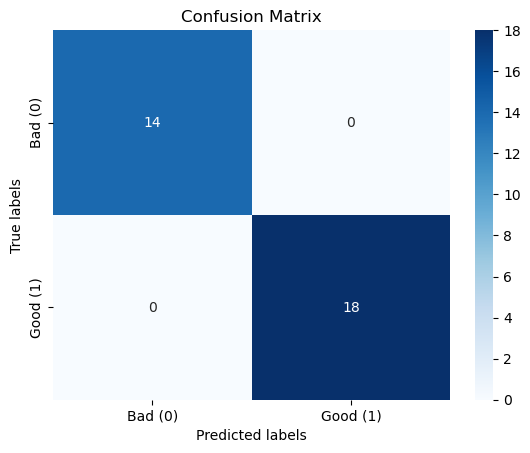

In [28]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### SVC Classifier Performance Summary

The confusion matrix depicts the performance of the SVC classifier on a dataset of 32 applicants (14 + 18 = 32). The matrix indicates how the classifier categorized these applicants into 'Bad (0)' and 'Good (1)' outcomes, achieving perfect classification with no mispredictions.

**Matrix Details:**
- **True Negatives (TN):** The classifier correctly identified 14 applicants as 'Bad (0)'. These true negatives indicate that the classifier was effective in accurately predicting negative outcomes where the actual and predicted results matched.
- **False Positives (FP):** There were no instances of false positives. This means no applicants were incorrectly predicted as 'Good (1)' when they were actually 'Bad (0)', underscoring the classifier's precision.
- **False Negatives (FN):** Similarly, there were no false negatives; the classifier did not mistakenly predict any applicants as 'Bad (0)' when they were actually 'Good (1)'. This demonstrates the model’s effectiveness in recognizing all positive outcomes.
- **True Positives (TP):** The classifier correctly predicted 18 applicants as 'Good (1)'. These true positives affirm the classifier's capability to identify applicants who had a positive experience in the program correctly.

**Summary:**
The SVC classifier exhibited flawless performance in this evaluation, correctly categorizing all 32 applicants with 100% accuracy. The absence of any false positives or false negatives highlights the model’s exceptional ability to distinguish accurately between 'Bad' and 'Good' outcomes.


In [29]:
#Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

#parameters prior to change
parameters1 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#Define the Model
tree = DecisionTreeClassifier()

In [30]:
# Define the parameter grid
parameters1 = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(tree, parameters1, cv=10)

# Fit GridSearchCV to the training data
tree_cv = grid_search.fit(X_train, Y_train)

# Output the best parameters and the best cross-validation accuracy
print("Tuned hyperparameters: (best parameters)", tree_cv.best_params_)
print("Accuracy: {:.2f}".format(tree_cv.best_score_))


Tuned hyperparameters: (best parameters) {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.00


In [31]:
grid_search = GridSearchCV(tree, parameters1, cv=10, verbose=1)


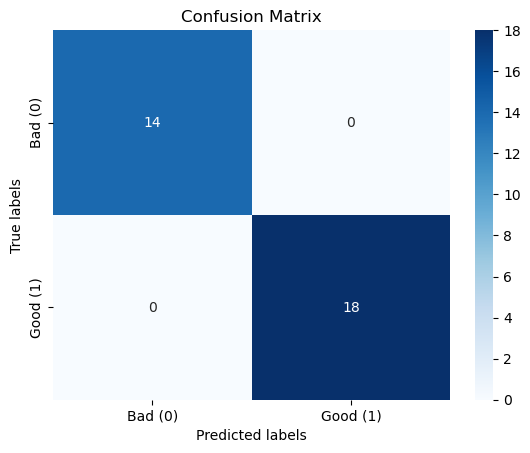

In [33]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Decision tree Performance Summary

The confusion matrix depicts the performance of the DT classifier on a dataset of 32 applicants (14 + 18 = 32). The matrix indicates how the classifier categorized these applicants into 'Bad (0)' and 'Good (1)' outcomes, achieving perfect classification with no mispredictions.

**Matrix Details:**
- **True Negatives (TN):** The classifier correctly identified 14 applicants as 'Bad (0)'. These true negatives indicate that the classifier was effective in accurately predicting negative outcomes where the actual and predicted results matched.
- **False Positives (FP):** There were no instances of false positives. This means no applicants were incorrectly predicted as 'Good (1)' when they were actually 'Bad (0)', underscoring the classifier's precision.
- **False Negatives (FN):** Similarly, there were no false negatives; the classifier did not mistakenly predict any applicants as 'Bad (0)' when they were actually 'Good (1)'. This demonstrates the model’s effectiveness in recognizing all positive outcomes.
- **True Positives (TP):** The classifier correctly predicted 18 applicants as 'Good (1)'. These true positives affirm the classifier's capability to identify applicants who had a positive experience in the program correctly.

**Summary:**
The Decision tree classifier exhibited flawless performance in this evaluation, correctly categorizing all 32 applicants with 100% accuracy. The absence of any false positives or false negatives highlights the model’s exceptional ability to distinguish accurately between 'Bad' and 'Good' outcomes.


 
- **Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.**


In [34]:
#Create a k nearest neighbors object
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()

In [35]:
#create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
grid_search = GridSearchCV(KNN, parameters, cv=10)
knn_cv = grid_search.fit(X_train, Y_train)


In [38]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 1.0


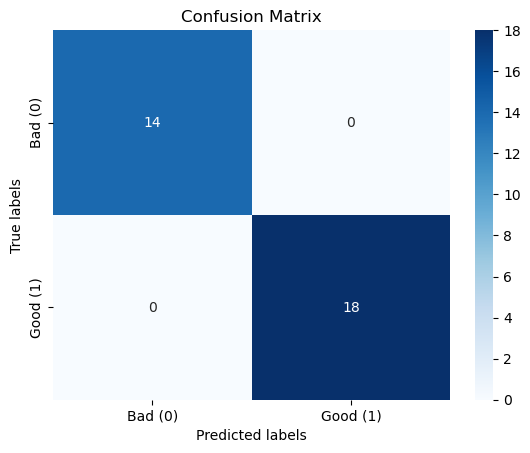

In [39]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


### KNN Classifier Performance Summary

This confusion matrix reflects the performance of the KNN classifier on a dataset of 32 applicants, accurately categorizing each applicant as either 'Bad (0)' or 'Good (1)'. The classifier achieved perfect classification without any mispredictions.

**Matrix Details:**
- **True Negatives (TN):** The classifier correctly predicted 14 applicants as 'Bad (0)'. These true negatives confirm the classifier's effectiveness in accurately identifying those who did not meet the criteria for a positive outcome.
- **False Positives (FP):** There were no instances where the classifier incorrectly predicted an applicant as 'Good (1)' when they were actually 'Bad (0)'. This indicates zero false positives, highlighting the classifier’s precision.
- **False Negatives (FN):** There were also no false negatives, where the classifier might have incorrectly predicted 'Bad (0)' for an applicant who was actually 'Good (1)'. The absence of false negatives demonstrates the classifier's accuracy in recognizing all positive cases.
- **True Positives (TP):** The classifier accurately identified 18 applicants as 'Good (1)'. These true positives show the classifier's capability to correctly identify those applicants who had a successful experience in the program.

**Summary:**
The KNN classifier exhibited flawless performance with a total prediction accuracy of 100%, correctly classifying all 32 applicants with no false positives or negatives. This result showcases the classifier's exceptional ability to distinguish accurately between 'Bad' and 'Good' outcomes.

**Comparison:**
Given the perfect performance of this KNN classifier, it can be considered the best performing model in this specific evaluation scenario, assuming no other classifiers demonstrated similar accuracy or better performance.


* By printing the accuracy of these models, you can determine which model best fits your data based on its ability to accurately predict outcomes on the test set. This step is crucial in the model selection process where you might choose the model that performs the best for deployment in production, or for further development and tuning.

In [41]:
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print( 'Accuracy for Support Vector Machine method:', svm_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearest neighbors method:', knn_cv.score(X_test, Y_test))


Accuracy for Logistics Regression method: 0.75
Accuracy for Support Vector Machine method: 1.0
Accuracy for Decision tree method: 1.0
Accuracy for K nearest neighbors method: 1.0


In [42]:
AccuracyScore=[0.75,1.0,1.0,1.0]
Metric=['LogisR','SVM','DTree','KNN']
Accuracy_Metrics={'Metric':Metric,'Accuracy Score':AccuracyScore}
Metrics_df=pd.DataFrame(Accuracy_Metrics)
Metrics_df


,Metric,Accuracy Score
0,LogisR,0.75
1,SVM,1.00
2,DTree,1.00
3,KNN,1.00


In [59]:
new_input=[[1,39,9]]
#get perdiction from new input
new_output=svm_cv.predict(new_input)


#Summarize input and output  
print(new_input, new_output)

# Predict the probabilities of the new input data for each class
proba = svm_cv.predict_proba(new_input)

# Extract the predicted probabilities of the first and second class
predicted_prob_0 = round(proba[0, 0] * 100, 2)
predicted_prob_1 = round(proba[0, 1] * 100, 2)

# Print the predicted class labels and probabilities as percentages
print("Predicted class label: ", new_output[0])
print("Predicted probability of class 0: ", predicted_prob_0, "%")
print("Predicted probability of class 1: ", predicted_prob_1, "%")


[[1, 39, 9]] [1]
Predicted class label:  1
Predicted probability of class 0:  22.42 %
Predicted probability of class 1:  77.58 %
